### Описание проекта
Мы изучим данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы и выявим некоторые закономерности, позволяющие спланировать рекламные кампании.


### Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data=pd.read_csv('C:\\YP\\games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных
В данных выявлены следующие проблемы:
- столбцы имеют неудобные названия
- пропуски в названии игры, годе выпуска, жанре (незначительное количество)
- пропуски в оценках критиков и пользователей (значительное количество)
- пропуски в рейтингах
- столбец года выпуска имеет неверный формат (float64 вместо int)
- столбец рейтинга пользователей имеет строковый формат вместо числового; кроме того, некоторые ячейки пользовательского рейтинга имеют значение `tbd` (скорее всего, речь о "to be determined" - ситуации с новыми играми, либо с играми, в которых недостаточно информации для оценком пользователей)

К пропускам, вероятно, привели технические ошибки (при переносе информации вручную забыли добавить название игры) либо недостаток информации (неизвестен год выпуска старой игры, недостаточно пользователей или критиков поставили игре оценку). 

Мы проделали следующие действия в рамках предобработки данных:
- переименовали столбцы
- проверили на дубликаты
- проверили на неявные дубликаты
- удалили строки с пропусками в названиях игры, годах выпуска и жанре, поскольку эти значения присутствовали в очень незначительном относительно всего датасета количестве
- **пропущенные и `tdb`-значения в столбце `user_score` заполнили значением -1, которое не будем в дальнейшем использовать в исследовательском анализе**
- **пропущенные в столбце `critic_score` также заполнили значением -1, которое не будем в дальнейшем использовать в исследовательском анализе**
- те значения, которые не удалось заполнить, оставили пропущенными, не учитывая их в ситуации проверки гипотезы
- заменили формат столбцов `year_of_release` и `user_score`
- добавили столбец `total_sales` с суммарными данными продаж игр по всем регионам

In [4]:
#переименование столбцов
data = data.rename(columns = {'Name':'name', 'Platform': 'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 
                             'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                             'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# проверка на дубликаты
data = data.drop_duplicates()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
# удаление строк с пропусками в столбцах 'year_of_release', 'genre', 'name'
data = data.dropna(subset=['year_of_release', 'genre', 'name'])

data['year_of_release']=data['year_of_release'].astype('int')


In [7]:
# проверка на неявные дубликаты
print(data['genre'].unique())
print(data['platform'].unique())
print(data['rating'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [8]:
# проверка выбросов в значениях годов выпуска
print(data['year_of_release'].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]


In [9]:
print(data['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [10]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [11]:
# добавление столбца с суммарными продажами по регионам
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [12]:
# обработка значения tbd и пропусков в столбце 'user_score'
data.loc[((data['user_score']=="tbd")|(data['user_score'].isna())),'user_score']=-1

data['user_score'] = data['user_score'].astype('float')


In [13]:
# обработка пропусков в столбце 'critic_score'
data.loc[(data['critic_score'].isna()),'critic_score']= -1

In [14]:
# обработка пропусков в рейтингах игр
data.loc[(data['rating'].isna()),'rating']= '-'

### Исследовательский анализ данных

Выясним количество игр, выпущенных в разные годы. Вы видим, что количество игр, сравнимое с актуальным 2016 годом, выпускалось начиная с 2000 года, а максимум пришёлся на 2007-2011 гг.

In [15]:
print(data.groupby('year_of_release').agg(count=('name','count')))

                 count
year_of_release       
1980                 9
1981                46
1982                36
1983                17
1984                14
1985                14
1986                21
1987                16
1988                15
1989                17
1990                16
1991                41
1992                43
1993                60
1994               121
1995               219
1996               263
1997               289
1998               379
1999               338
2000               350
2001               482
2002               829
2003               775
2004               762
2005               939
2006              1006
2007              1197
2008              1427
2009              1426
2010              1255
2011              1136
2012               653
2013               544
2014               581
2015               606
2016               502


#### Наиболее популярные платформы
Исследуем продажи на разных платформах. Выведем топ-10 платформ с наибольшими продажами и отдельно построим графики для продаж топ-5 самых популярных платформ. Мы видим, что средний срок, за который появляется, набирает популярность и исчезает платформа, составляет 10 лет, таким образом, для исследования популярности платформ в дальнейшем достаточно брать срок с 2006 года.

In [16]:
data_grouped=data.groupby('platform').agg(total_sales=('total_sales','sum')).sort_values(by='total_sales', ascending=False)
print(data_grouped.head(10))


          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81


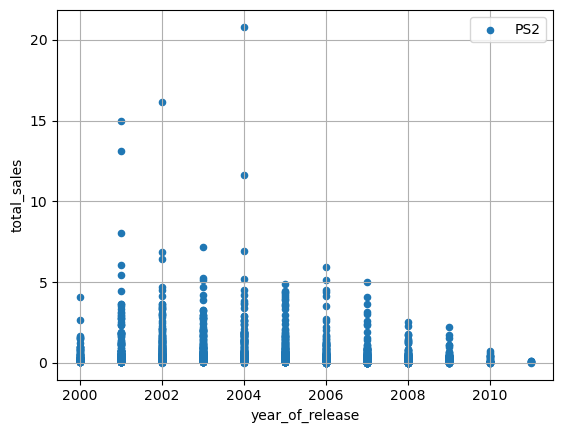

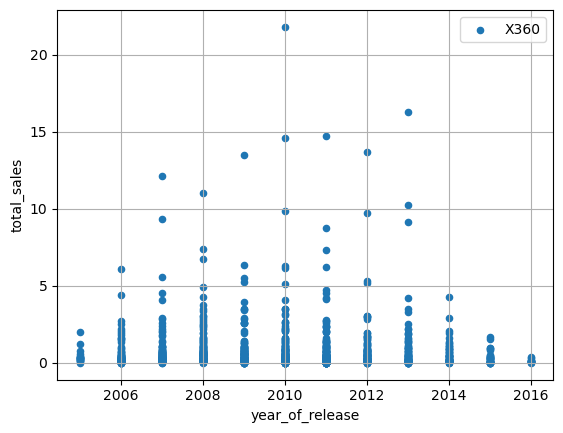

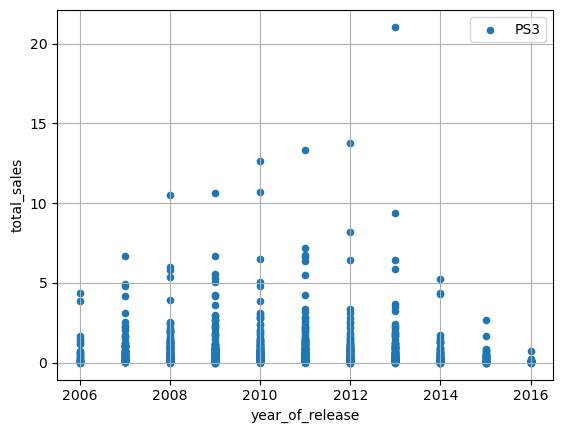

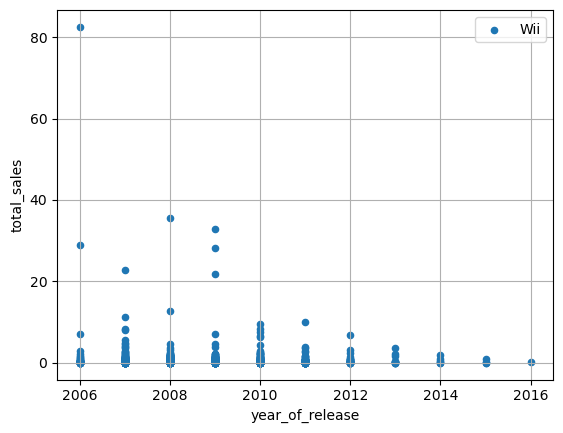

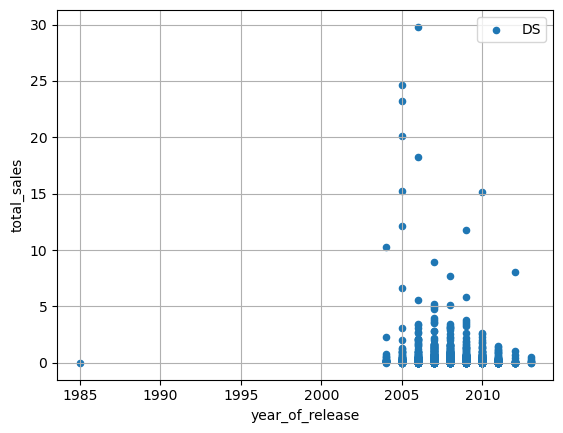

In [17]:
popular_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for platform in popular_platforms:
    data.query('platform == @platform').plot(kind='scatter', x='year_of_release', y='total_sales', label=platform, grid=True)
    plt.show();

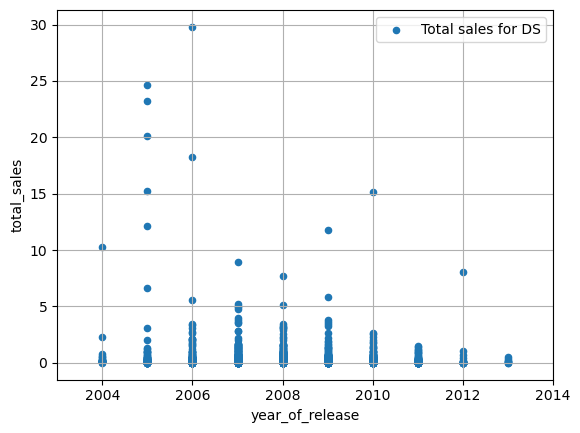

In [18]:
#для платформы DS мы видим выброс в районе 1985 года, скорее всего, это опечатка, поэтому для построения графика 
# ограничимся промежутком (2003,2014)

data.query('platform == "DS"').plot(kind='scatter', x='year_of_release', y='total_sales', label='Total sales for DS', grid=True, xlim=(2003,2014))
plt.show();

Выясним потенциально прибыльные платформы, изучив данные по продажам с 2006 по 2016 год. Мы видим, что на конец 2016 года **сохраняют популярность платформы: 3DS, PS4, XOne**  и отчасти *PS, PS3, PSV, WiiU (хотя они уже находится на излете популярности).*

In [19]:
print(data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'))

year_of_release   1980   1981   1982   1983   1984   1985   1986   1987  \
platform                                                                  
2600             11.38  35.68  28.88   5.84   0.27   0.45   0.67   1.94   
3DO                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3DS                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DC                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DS                 NaN    NaN    NaN    NaN    NaN   0.02    NaN    NaN   
GB                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
GBA                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
GC                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
GEN                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
GG                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
N64                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NES                NaN   

Выберем 5 наиболее популярных платформ на конец 2016 года.

In [20]:
print(data.query('year_of_release == 2016').groupby('platform').agg(total_sales=('total_sales','sum')).sort_values(by='total_sales', ascending=False).head())

          total_sales
platform             
PS4             69.25
XOne            26.15
3DS             15.14
PC               5.25
WiiU             4.60


Далее мы ограничимся для прогнозирования только данными с 2012 года. Построим суммарных графики продаж на пяти наиболее популярных платформах за период с 2012 по 2016 гг.


Total sales for PS4


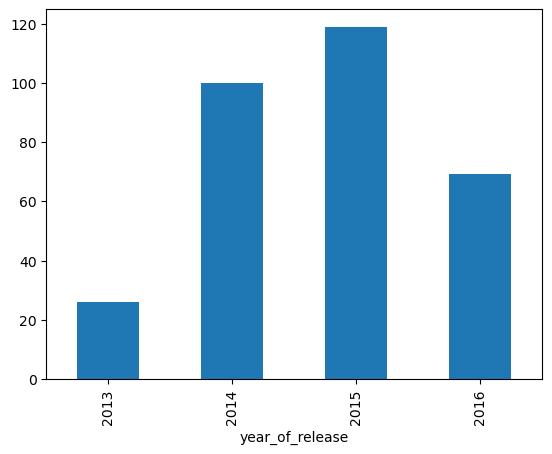

Total sales for XOne


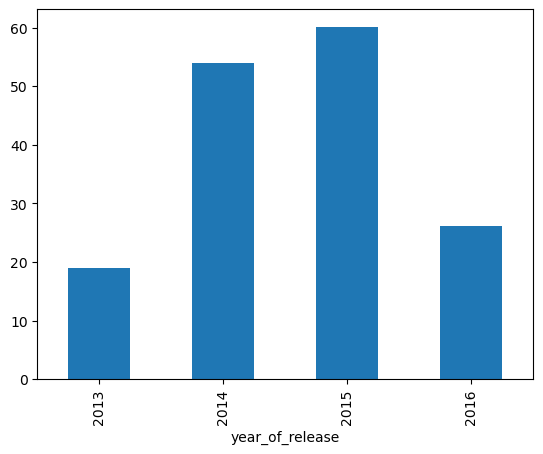

Total sales for 3DS


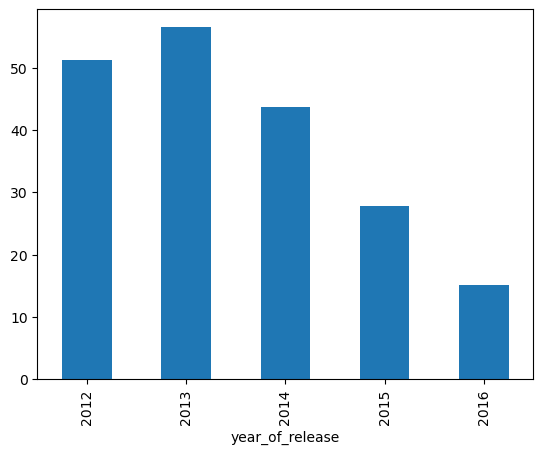

Total sales for PC


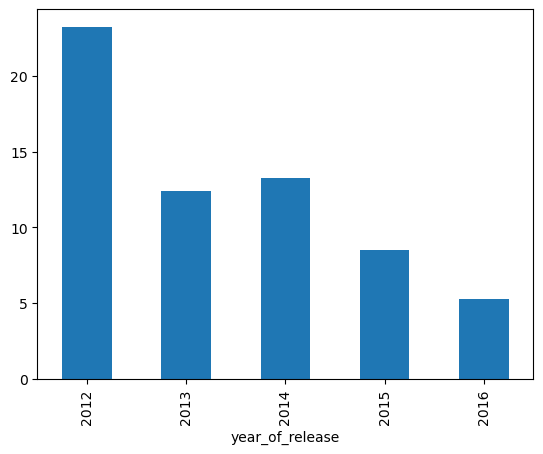

Total sales for WiiU


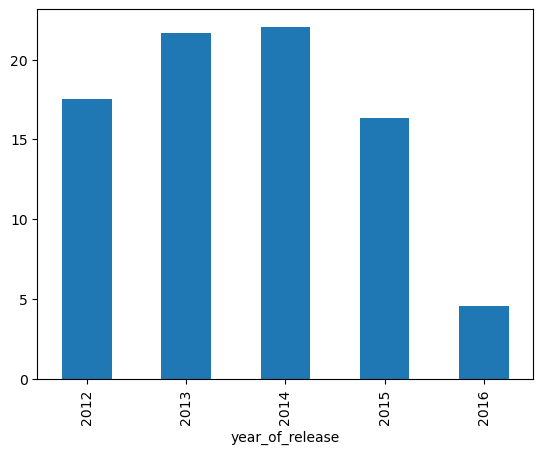

In [21]:
data = data.query('year_of_release > 2011')
popular_platforms_2016 = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

for platform in popular_platforms_2016:
    print('Total sales for', platform)
    data.query('platform == @platform').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', x='year_of_release', 
                                            y='total_sales')
    plt.show();

#### Диаграмма размаха по глобальным продажам игр в разбивке по пяти наиболее популярным платформам на конец 2016 года.
Мы построили "ящики с усами" для топ-5 наиболее популярных платформ на конец 2016 года, а также нашли описательные статистики. Мы видим, что для платформ PS4, XOne и WiiU медианное глобальных продаж составляет в районе 0.2 млн. проданных копий, при этом есть игры, продажи которых существенно превосходят данные значения. Медианные значения продаж для платформ PC и 3DS меньше (0.12 и 0.05 млн., соответственно). Таким образом, мы можем считать наиболее перспективными платформы PS4, ХOne и WiiU.

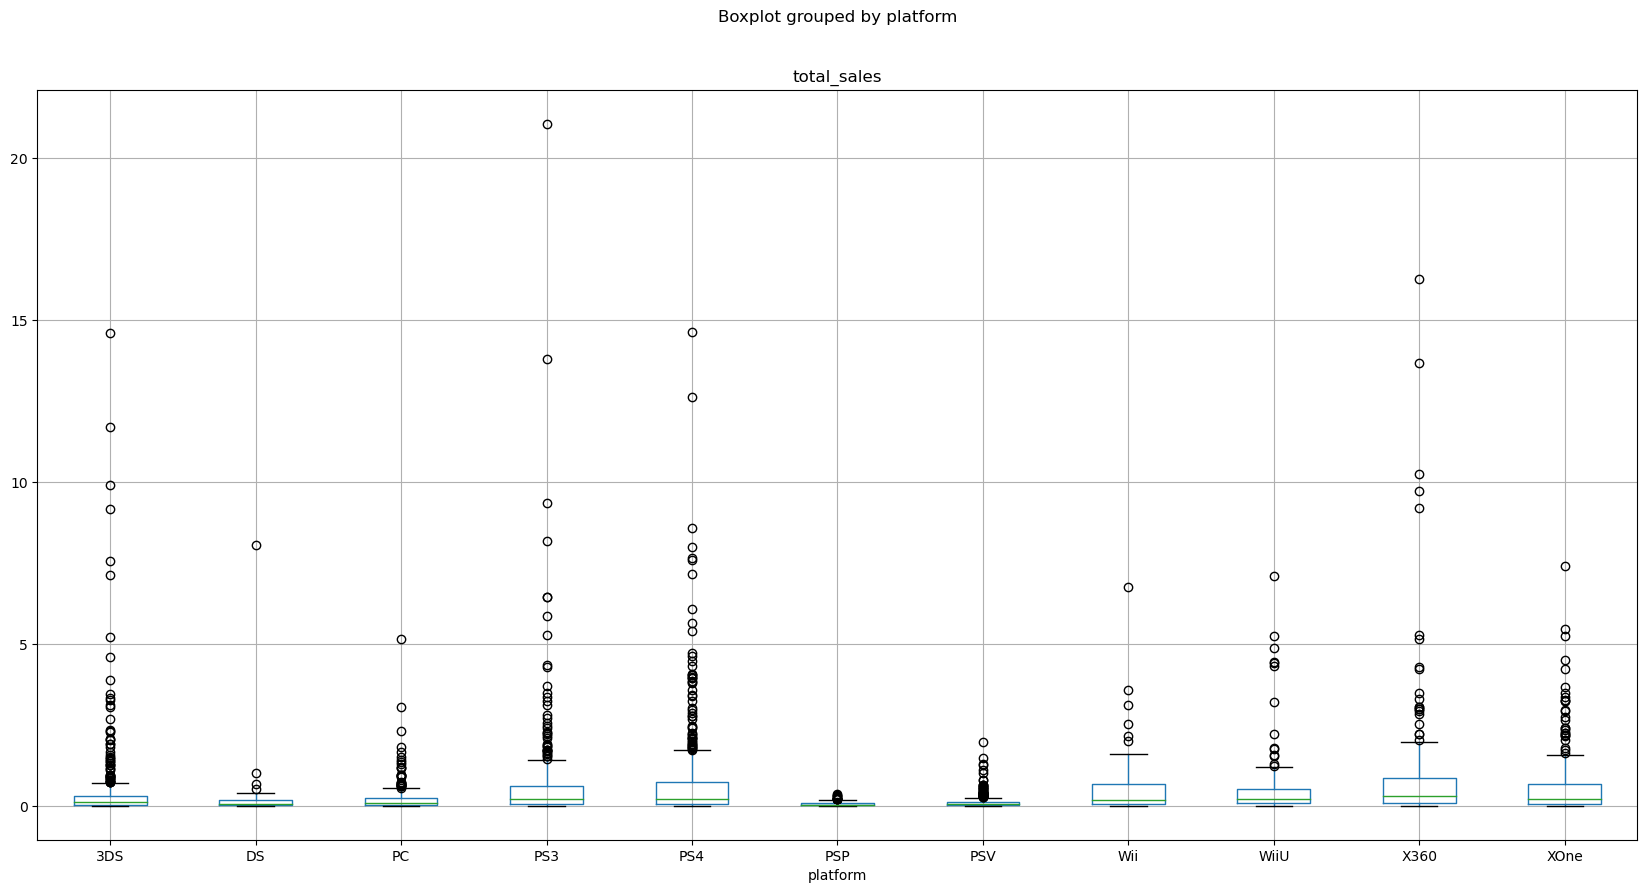

In [22]:
data.boxplot(by='platform', column='total_sales', figsize = (20, 10), grid = True)
plt.show();

#data.boxplot(by='platform', column='total_sales', figsize = (20, 10), grid = True, ylim =(0,3))
#plt.show();


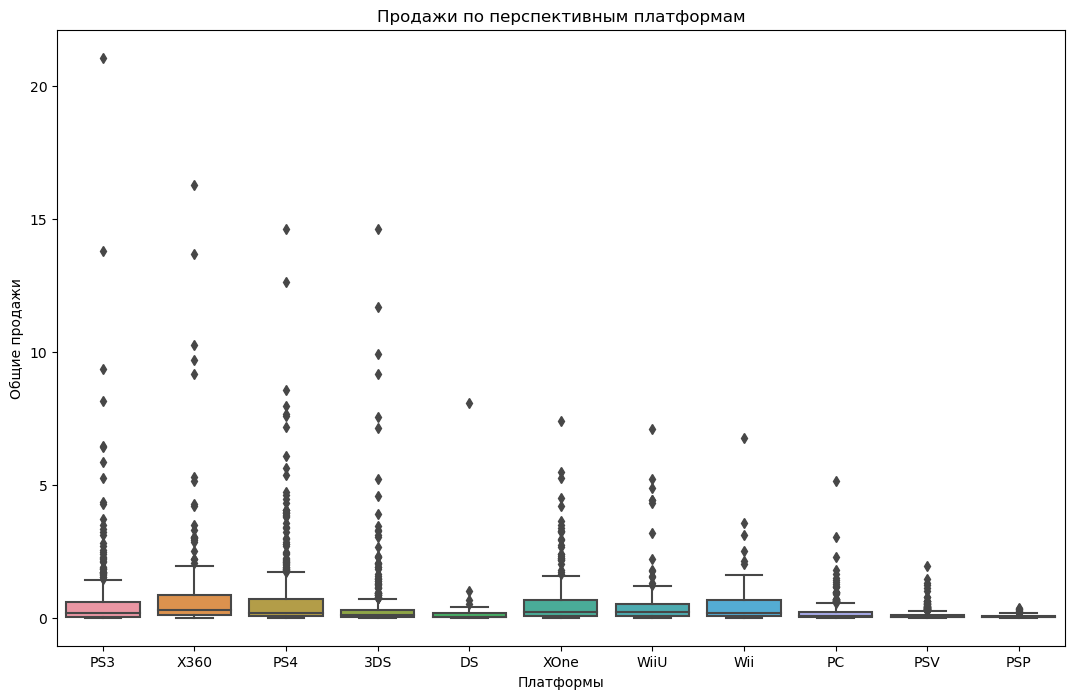

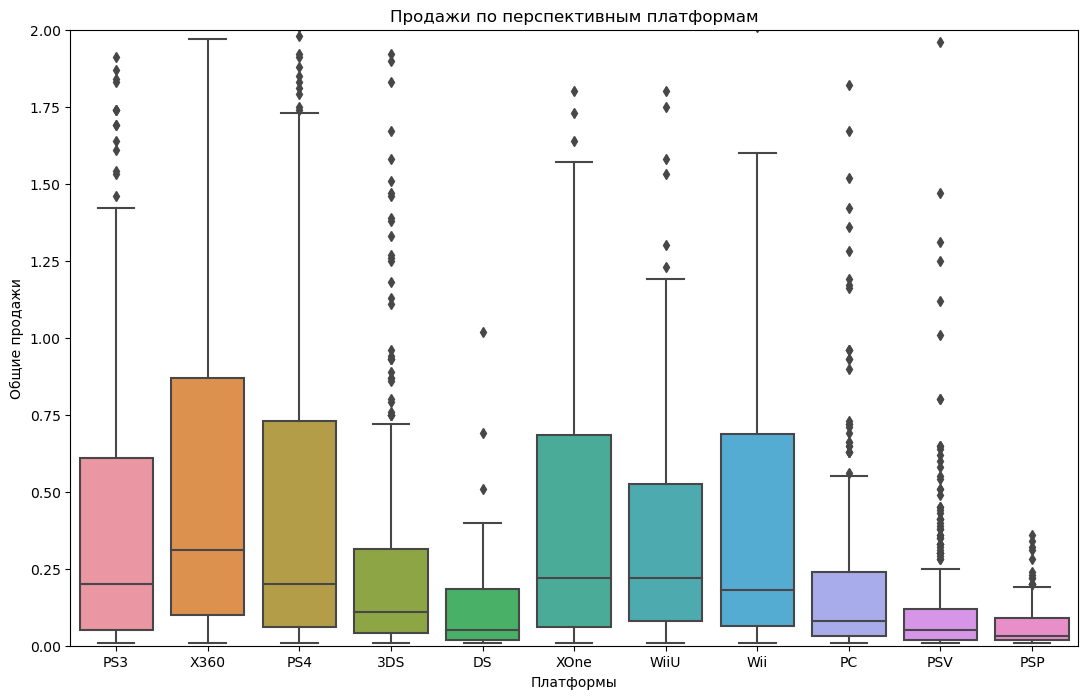

In [23]:
# Другой вариант визуализации
import seaborn as sns
data_temp, y = data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

#### Исследование корреляции продаж и оценок критиков
Глобально между продажами и оценками пользователей есть слабая положительная связь (коэффициент корреляции равен 0.3).

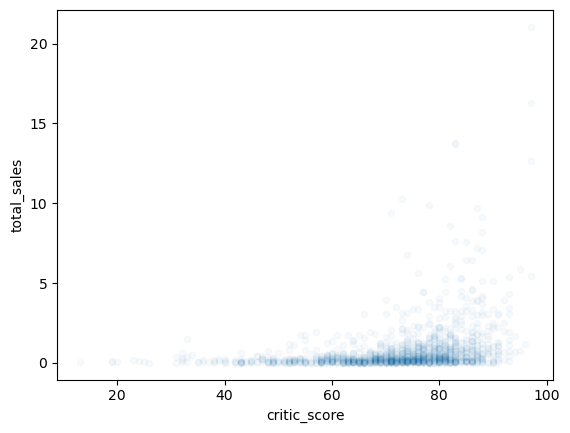

Коэффициент корреляции продаж и оценок критиков равен 0.3081967459207781


In [24]:
data
data.query('critic_score>=0').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.03)
plt.show();
cor=data.query('critic_score>=0')['critic_score'].corr(data.query('critic_score>=0')['total_sales'])
print('Коэффициент корреляции продаж и оценок критиков равен', cor)

#### Исследование корреляции продаж и оценок пользователей
Глобально между продажами и оценками пользователей практически нет связи (коэффициент корреляции близок к нулю).

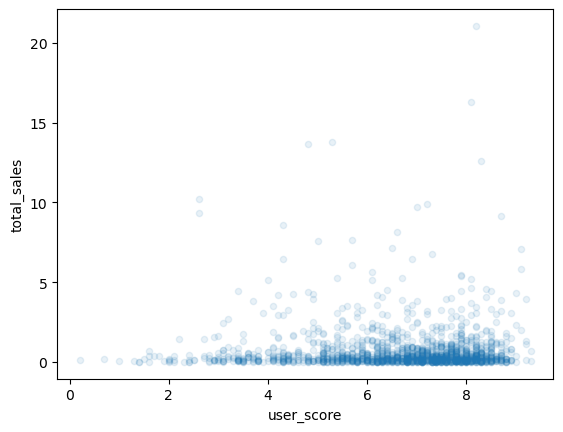

Коэффициент корреляции продаж и оценок пользователей равен 0.004428817675493256


In [35]:
data.query('user_score>=0').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1)
plt.show();

cor=data.query('user_score>=0')['user_score'].corr(data.query('user_score>=0')['total_sales'])
print('Коэффициент корреляции продаж и оценок пользователей равен', cor)

#### Исследование корреляции продаж и оценок критиков внутри одной платформы.
Выводы внутри наиболее популярных платформ совпадают с глобальными выводами (слабая положительная связь), коэффициент корреляции выше глобального для платформ `PS4`, `XOne`, `WiiU`, ниже глобального - для платформ `3DC`, `PC`.


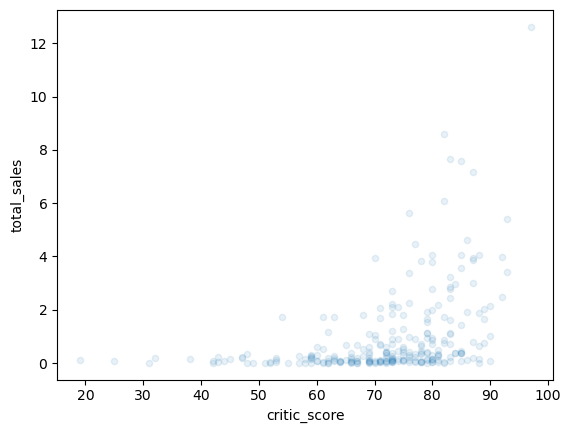

Коэффициент корреляции продаж и оценок критиков равен внутри платформы PS4 = 0.40656790206178095


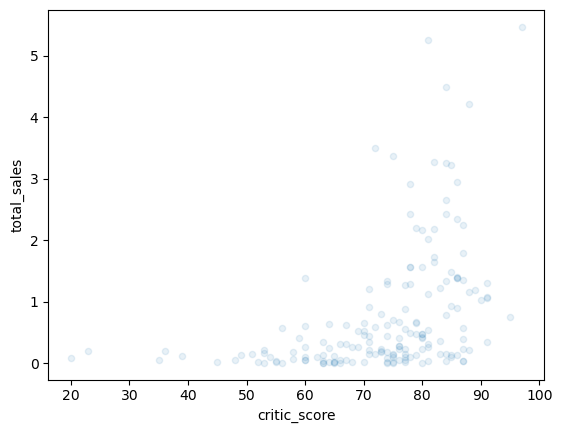

Коэффициент корреляции продаж и оценок критиков равен внутри платформы XOne = 0.4169983280084017


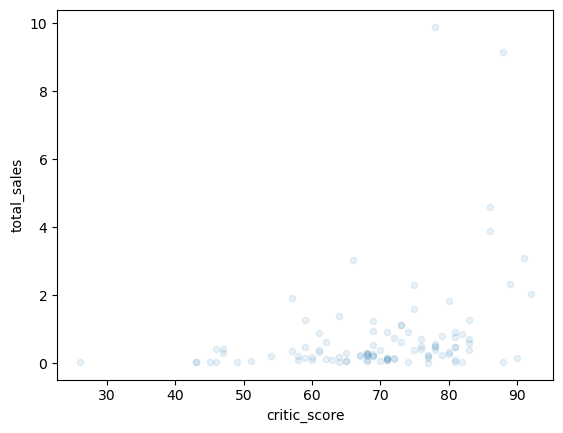

Коэффициент корреляции продаж и оценок критиков равен внутри платформы 3DS = 0.3208028695360785


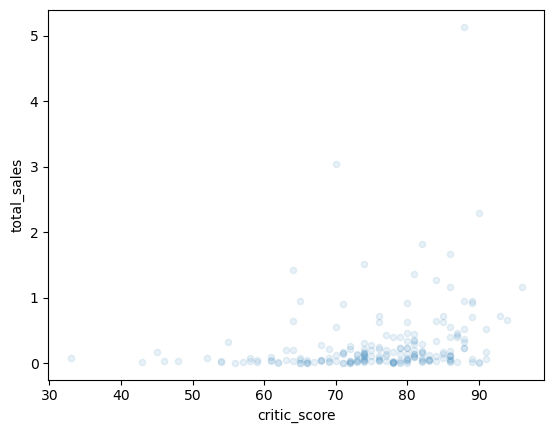

Коэффициент корреляции продаж и оценок критиков равен внутри платформы PC = 0.23724324311567915


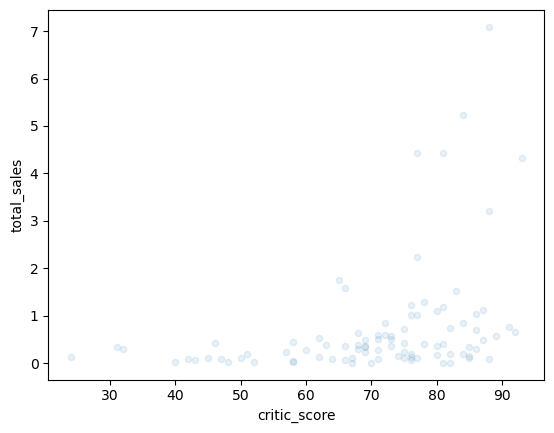

Коэффициент корреляции продаж и оценок критиков равен внутри платформы WiiU = 0.34837976012017485


In [36]:
popular_platforms_2016 = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']
for platform in popular_platforms_2016:
    data_platform = data.query('platform == @platform')
    data_platform = data_platform.query('critic_score>=0')
    data_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1)
    plt.show();
    cor = data_platform['critic_score'].corr(data_platform['total_sales'])
    print('Коэффициент корреляции продаж и оценок критиков равен внутри платформы', platform, '=', cor)



#### Исследование корреляции продаж и оценок пользователей внутри одной платформы.
Выводы внутри наиболее популярных платформ совпадают также с глобальными выводами (связь практически отсутствует, коэффициент корреляции близок к нулю) для всех платформ, кроме `WiiU` (коэффициент корреляции равен 0.4).

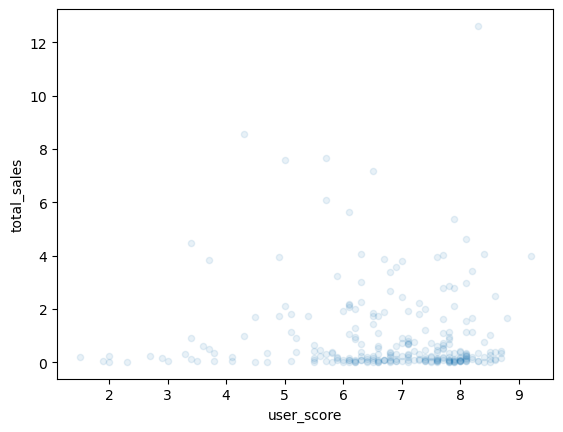

Коэффициент корреляции продаж и оценок пользователей внутри платформы PS4 = -0.031957110204556376


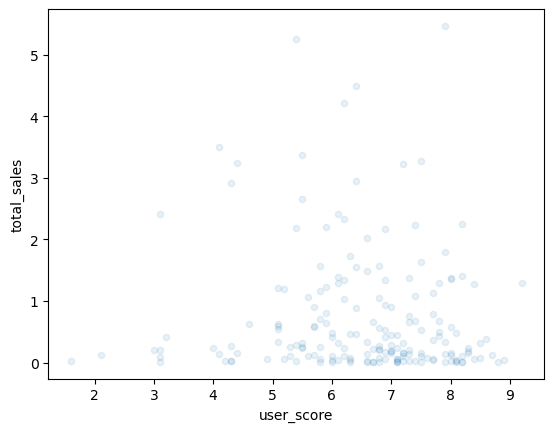

Коэффициент корреляции продаж и оценок пользователей внутри платформы XOne = -0.06892505328279414


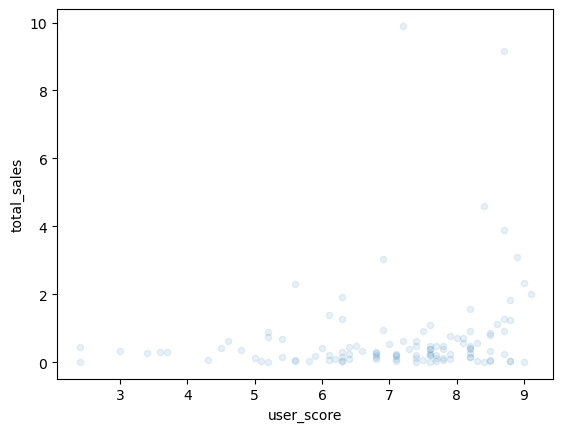

Коэффициент корреляции продаж и оценок пользователей внутри платформы 3DS = 0.19758263411038599


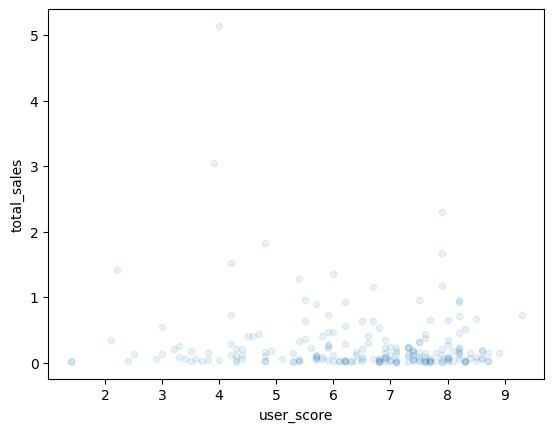

Коэффициент корреляции продаж и оценок пользователей внутри платформы PC = -0.12186747630735577


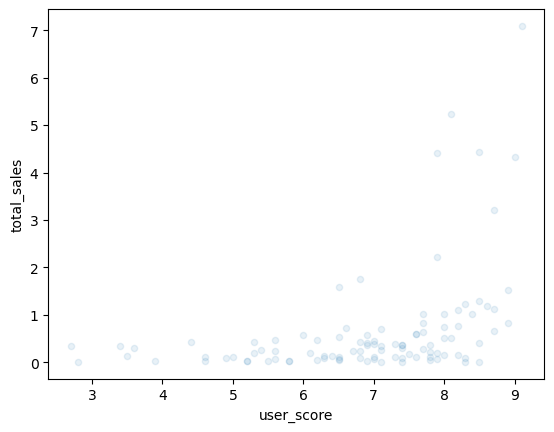

Коэффициент корреляции продаж и оценок пользователей внутри платформы WiiU = 0.4002190202148617


In [37]:
for platform in popular_platforms_2016:
    data_platform = data.query('(platform == @platform)&(user_score> =0)')
    
    data_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1)
    plt.show();
    cor = data_platform['user_score'].corr(data_platform['total_sales'])
    print('Коэффициент корреляции продаж и оценок пользователей внутри платформы', platform, '=', cor)

#### Распределение игр по жанрам
Наиболее прибыльными жанрами в общей статистике являются `Action`, `Sports`, `Shooter`, `Misc`, `Role-Playing`, но при этом прибыльность может быть обусловлена выходом отдельных популярных игр в соответствующем жанре. 
Исходя из исследования медианных значений и диаграмм размаха для жанров, мы можем назвать наиболее прибыльными жанрами `Shooter`, `Sports`, `Platform`, `Role-Playing`, `Racing`, из которых жанр `Shooter` наименее предсказуем (имеет максимальный среди пятёрки лидеров размах).

,sum,median
genre,,
Shooter,304.73,0.44
Sports,181.07,0.24
Platform,61.00,0.21
Role-Playing,192.80,0.14
Racing,53.50,0.14


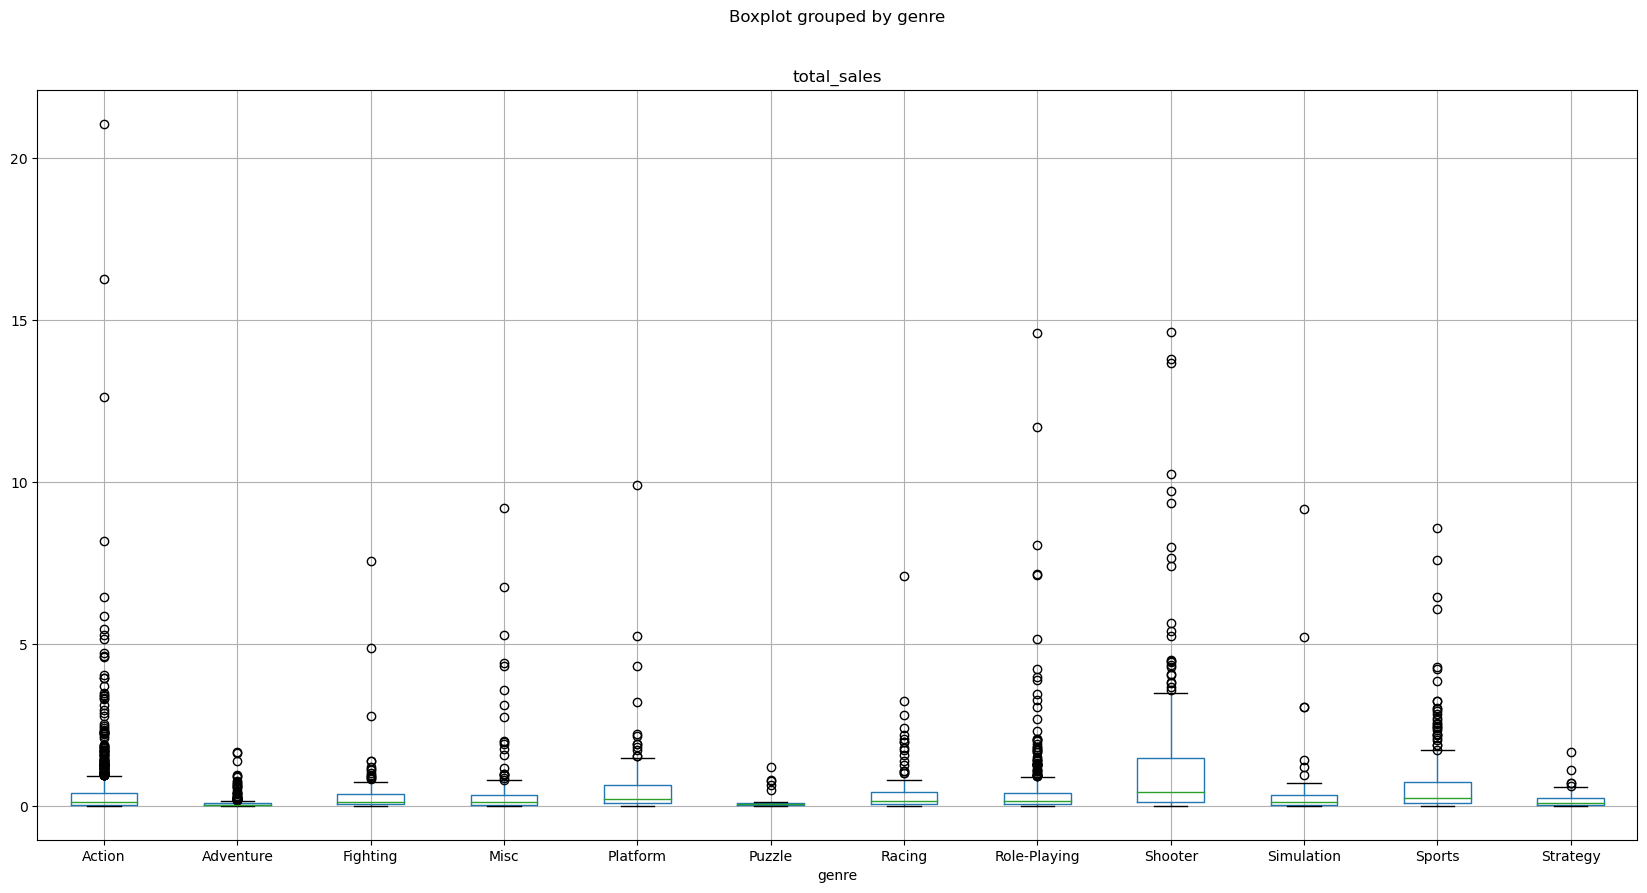

In [28]:
display(data.groupby('genre').agg(sum=('total_sales','sum'),median=('total_sales','median'))
        .sort_values(by='median', ascending=False).head())
data.boxplot(by='genre', column='total_sales', grid=True, figsize=(20,10))
plt.show();

### Портрет пользователя по регионам

В **Северной Америке** наиболее продаваемыми жанрами по сумме продаж являются `Action`, `Shooter`,  `Sports`, `Misc`, `Role-Playing`, по медианным продажам - `Shooter`, `Platform`, `Sports`, `Fighting`, `Racing`, самыми популярными платформами - `X360`, `Wii`, `PS3`, `DS`, `PS4`, самыми продаваемыми играми являются игры с рейтингом E, M, T, E10+ и игры без рейтинга.



In [29]:
display(data.groupby('genre').agg(na_sales=('na_sales','sum'), median=('na_sales','median')).sort_values(by='median', ascending=False).head())
na_platform=data.groupby('platform').agg(na_sales=('na_sales','sum'))
na_sales_sum = na_platform['na_sales'].sum()
na_platform['part']=na_platform['na_sales']/na_sales_sum 
display(na_platform.sort_values(by='na_sales', ascending=False).head())
display(data.groupby('rating').agg(na_sales=('na_sales','sum')).sort_values(by='na_sales', ascending=False))


,na_sales,median
genre,,
Shooter,144.77,0.20
Platform,25.38,0.09
Sports,81.53,0.08
Fighting,19.79,0.05
Racing,17.22,0.04


,na_sales,part
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592


,na_sales
rating,
M,231.57
E,114.37
-,103.31
E10+,75.70
T,66.02


В **Японии** наиболее продаваемыми жанрами являются `Role-Playing`, `Action`, `Misc`, `Sports`, `Adventure`, наиболее прибыльными по медианному среднем - `Role-Playing`, `Fighting`, `Misc`, `Action`, `Adventure`, самыми популярными платформами - `DS`, `3DS`, `PS3`, `PSP`, `Wii`, самыми продаваемыми играми являются игры без рейтинга и игры с рейтингом E, M, T, E10+.

In [30]:
display(data.groupby('genre').agg(sum=('jp_sales','sum'), median=('jp_sales', 'median')).sort_values(by='median', ascending=False).head())
jp_platform = data.groupby('platform').agg(jp_sales=('jp_sales','sum'))
jp_sales_sum = jp_platform['jp_sales'].sum()
jp_platform['part']=jp_platform['jp_sales']/jp_sales_sum 
display(jp_platform.sort_values(by='jp_sales', ascending=False).head())
display(data.groupby('rating').agg(jp_sales=('jp_sales','sum')).sort_values(by='jp_sales', ascending=False))


,sum,median
genre,,
Role-Playing,65.44,0.06
Fighting,9.44,0.03
Misc,12.86,0.02
Action,52.80,0.01
Adventure,8.24,0.01


,jp_sales,part
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556


,jp_sales
rating,
-,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


In [31]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


-       1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

В **Европе** наиболее прибыльными жанрами являются `Action`, `Shooter`,  `Sports`, `Misc`, `Racing`,  самыми стабильно популярными жанрами по медианному среднему продаж - `Shooter`, `Racing`, `Platform`, `Sports`, `Simulaton`, самыми популярными платформами - `PS3`, `X360`, `Wii`, `PS4`, `DS`, самыми продаваемыми играми являются игры с рейтингом E, M, T, E10+ и игры без рейтинга.

In [32]:
display(data.groupby('genre').agg(eu_sales=('eu_sales','sum'), median = ('eu_sales', 'median')).sort_values(by='median', ascending=False).head())
eu_platform = data.groupby('platform').agg(eu_sales=('eu_sales','sum'))
eu_sales_sum = eu_platform['eu_sales'].sum()
eu_platform['part']=eu_platform['eu_sales']/eu_sales_sum 
display(eu_platform.sort_values(by='eu_sales', ascending=False).head())
display(data.groupby('rating').agg(eu_sales=('eu_sales','sum')).sort_values(by='eu_sales', ascending=False))


,eu_sales,median
genre,,
Shooter,113.47,0.17
Racing,27.29,0.09
Platform,21.41,0.08
Sports,69.09,0.05
Simulation,14.55,0.03


,eu_sales,part
platform,,
PS4,141.09,0.278383
PS3,106.86,0.210844
X360,74.52,0.147034
XOne,51.59,0.101792
3DS,42.64,0.084132


,eu_sales
rating,
M,193.96
E,113.03
-,91.50
E10+,55.37
T,52.96


### Проверка гипотез

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

Мы воспользуемся критерием равенства средних значений для независимых выборок с различными дисперсиями.
Уровень значимости мы берем равным 0.05.
Для дополнительной проверки мы вычислим p-value для критерия равенства средних значений для независимых выборок с одинаковыми дисперсиями и убедимся в совпадении результатов.

In [33]:
from scipy import stats as st

H0 = 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые'
H1 = 'Средние пользовательские рейтинги платформ Xbox One и PC разные'
data_clean = data[data['user_score']>=0]

results = st.ttest_ind(data_clean.query('platform=="XOne"')['user_score'], 
                       data_clean.query('platform=="PC"')['user_score'], equal_var = False)
results2 = st.ttest_ind(data_clean.query('platform=="XOne"')['user_score'], 
                       data_clean.query('platform=="PC"')['user_score'], equal_var = True)


alpha = 0.05
pv = results.pvalue
pv2 = results2.pvalue
print('Средний пользовательский рейтинг платформы Xbox One равен', data_clean.query('platform=="XOne"')['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC равен', data_clean.query('platform=="PC"')['user_score'].mean())
print('Дисперсия пользовательского рейтинга платформы Xbox One равна', np.var(data_clean.query('platform=="XOne"')['user_score']))
print('Дисперсия пользовательского рейтинга платформы PC равна', np.var(data_clean.query('platform=="PC"')['user_score']))

print('p-value different var = ', pv)
print('p-value equal var = ', pv2)
if (pv < alpha) and (pv2 < alpha):
    print('Принимаем гипотезу Н1:', H1)
elif (pv>= alpha) and (pv2 >= alpha):
    print('Принимаем гипотезу Н0:', H0)
else:
    print('Результат противоречив, требуется дополнительное исследование')

Средний пользовательский рейтинг платформы Xbox One равен 6.521428571428572
Средний пользовательский рейтинг платформы PC равен 6.4286407766990274
Дисперсия пользовательского рейтинга платформы Xbox One равна 1.8965188383045533
Дисперсия пользовательского рейтинга платформы PC равна 2.7569952398906565
p-value different var =  0.5489537965134912
p-value equal var =  0.5535080500643661
Принимаем гипотезу Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные

Мы воспользуемся критерием равенства средних значений для независимых выборок с различными дисперсиями.
Уровень значимости мы берем равным 0.05.
Для дополнительной проверки мы вычислим p-value для критерия равенства средних значений для независимых выборок с одинаковыми дисперсиями и убедимся в совпадении результатов.

In [34]:
H0 = 'Средние пользовательские рейтинги жанров Action и Sports одинаковые'
H1 = 'Средние пользовательские рейтинги жанров Action и Sports разные'
results = st.ttest_ind(data_clean.query('genre=="Action"')['user_score'], 
                       data_clean.query('genre=="Sports"')['user_score'], equal_var = False)
results2 = st.ttest_ind(data_clean.query('genre=="Action"')['user_score'], 
                       data_clean.query('genre=="Sports"')['user_score'], equal_var = False)

alpha = 0.05
pv = results.pvalue
pv2 = results2.pvalue
print('Средний пользовательский рейтинг жанра Action равен', data_clean.query('genre=="Action"')['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports равен', data_clean.query('genre=="Sports"')['user_score'].mean())
print('Дисперсия пользовательского рейтинга жанра Action равна', np.var(data_clean.query('genre=="Action"')['user_score']))
print('Дисперсия пользовательского рейтинга жанра Sports равна', np.var(data_clean.query('genre=="Sports"')['user_score']))
print('p-value different var = ', pv)
print('p-value equal var = ', pv2)
if (pv  < alpha):
    print('Принимаем гипотезу Н1:', H1)
else :
    print('Принимаем гипотезу Н0:', H0)

Средний пользовательский рейтинг жанра Action равен 6.825047801147227
Средний пользовательский рейтинг жанра Sports равен 5.455897435897437
Дисперсия пользовательского рейтинга жанра Action равна 1.8854720340439228
Дисперсия пользовательского рейтинга жанра Sports равна 3.007388297172914
p-value different var =  4.24307776572644e-20
p-value equal var =  4.24307776572644e-20
Принимаем гипотезу Н1: Средние пользовательские рейтинги жанров Action и Sports разные


### Вывод

Мы изучили данные о продажах компьютерных игр за период с 1985 по 2016 год с целью выявления факторов, влияющих на продажи.
Мы изучили, как на продажу игры влияют следующие факторы: 
- регион пользователя
- используемая платформа
- жанр игры
- рейтинг игры
- оценки критиков и пользователей.

**Мы установили, что портрет пользователя Европы и Северной Америки во многом схожи, а вот тенденции, имеющие место в Японии, существенно отличаются, поэтому мы рекомендуем сконцентрироваться на Европейском и Североамериканском регионах.**

Мы установили, что платформы набирают популярность и теряют её за 10 лет, таким образом, для прогнозирования взяли половину этого период, т.е. данные с 2011 года. На конец 2016 года наиболее прибыльными платформами в мире оказались: `PS4`, `XOne`, `3DS`, `PC`, `WiiU`, при этом любопытно, что в отдельных регионах наиболее прибыльными могут являться платформы, не вошедшие в мировой ТОП-5. В частности, в Европе лидерами продаж стали - `PS3`, `X360`, `Wii`, `PS4`, `DS` (платформы перечислены в порядке убывания доли рынка от 23% до 8%), в Северной Америке - `X360`, `Wii`, `PS3`, `DS`, `PS4` (от 26% до 5%), в Японии - `DS`, `3DS`, `PS3`, `PSP`, `Wii` (от 21% до 12%).

**Мы рекомендуем сконцентрироваться на платформе PS4 во всех регионах, кроме Японии - она наиболее прибыльная как в мире, так и в Европе и Северной Америке.**
Наиболее прибыльными жанрами в общей статистике оказались `Action`, `Sports`, `Shooter`, `Misc`, `Role-Playing`, при этом в Северной Америке ситуация совпадает с общемировой (наиболее популярны `Action`, `Shooter`,  `Sports`, `Misc`, `Role-Playing` - перечислены в порядке убывания популярности), в Европе - `Action`, `Shooter`,  `Sports`, `Misc`, `Racing`, в Японии -  `Role-Playing`, `Action`, `Misc`, `Sports`, `Adventure`.

Отметим, что прибыльность жанров, в частности, `Action`, может быть обусловлено отдельными популярными играми, но не является стабильным прибыльным жанром. Дополнительно рассматривая медианные значения продаж по жанрам для выявления стабильно прибыльных жанром, мы установили, что

**Жанрами, которые сочетают высокую суммарную прибыль с высокой медианной являются Shooter, Racing, Sports в Европе, Shooter и Sports в Северной Америке, а также Role-Playing, Misc, Action в Японии.**

Во всех регионах подавляющую долю рынка занимают игры с рейтингами Е, М, Т, Е10+ и игры вне рейтинга, при этом

**в Европе и Северной Америке наибольшую популярность имеют игры с рейтингами E и М, а в Японии - игры вне рейтинга (мы уже отмечали, что японские тендецнии отличаются от мировых).**

Мы изучили влияние оценок пользователей и критиков на продажи и можем сделать следующие выводы:
    - отзывы пользователей практически не влияют на продажи как глобально, так и при изучении отдельных платформ
    - отзывы критиков незначительно, но всё же влияют на продажи (коэффициент корреляции в среднем 0.3), при этом внутри платформ эффект может быть как более, так и менее выражен.
    
    
**Для рекомендуемой платформы PS4 коэффициент корреляции между оценками критиков и продажами выше среднего и равен 0.4.**
